In [ ]:
#  Exploratory Data Analysis – Benin

In [4]:
# Import Libraries inspect the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df=pd.read_csv("../data/benin-malanville.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


In [5]:
df = df.drop(columns=["Comments"], errors="ignore")

irr_cols = ["GHI","DNI","DHI"]
for c in irr_cols:
    df.loc[df[c] < 0, c] = np.nan
    df[c] = df[c].fillna(df[c].median())

num_cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = np.abs(stats.zscore(df[num_cols], nan_policy='omit'))
df_clean = df[(z < 3).all(axis=1)]

print("Original:", df.shape, "→ Cleaned:", df_clean.shape)


Original: (525600, 18) → Cleaned: (512680, 18)


##  Time Series Analysis

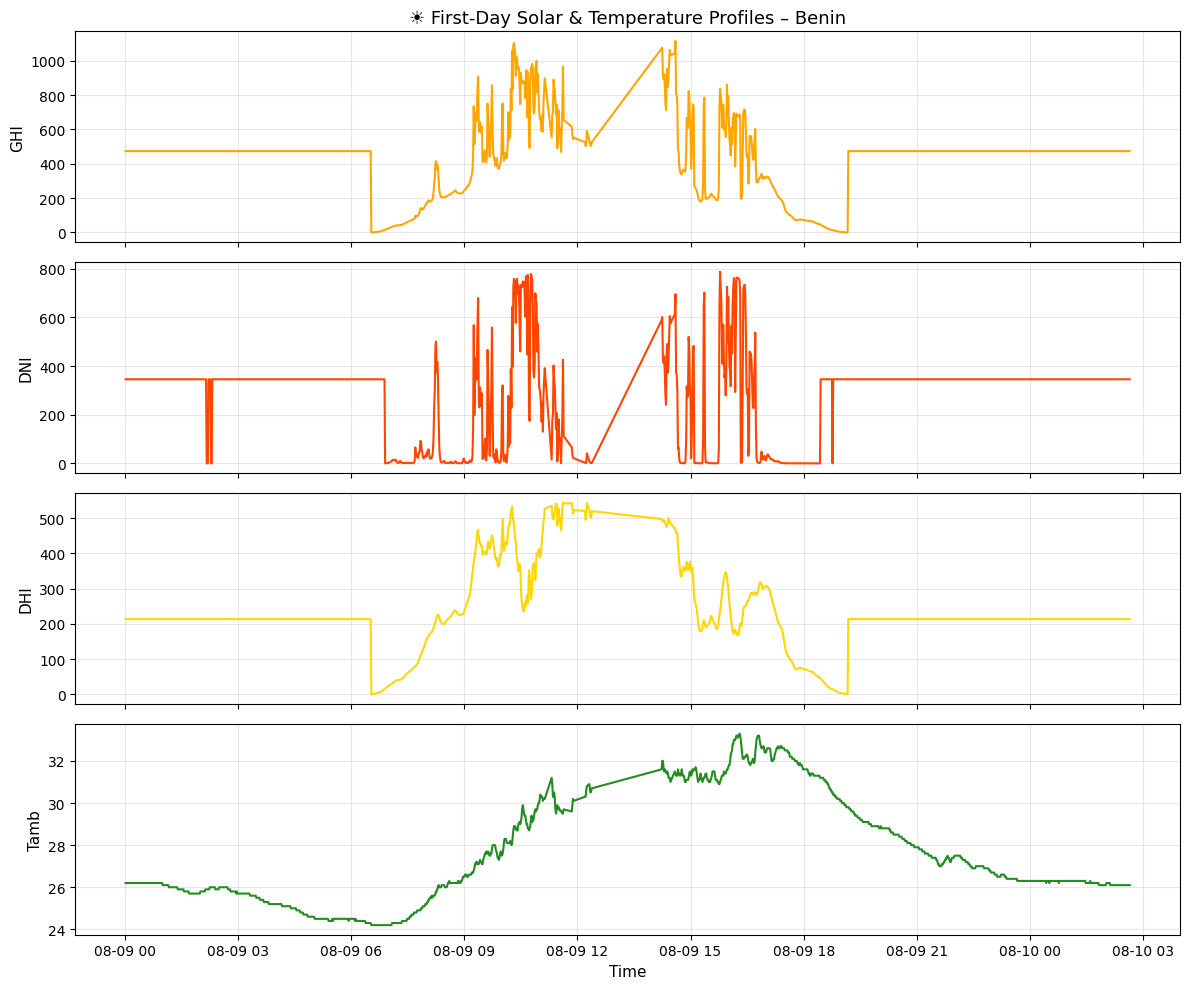

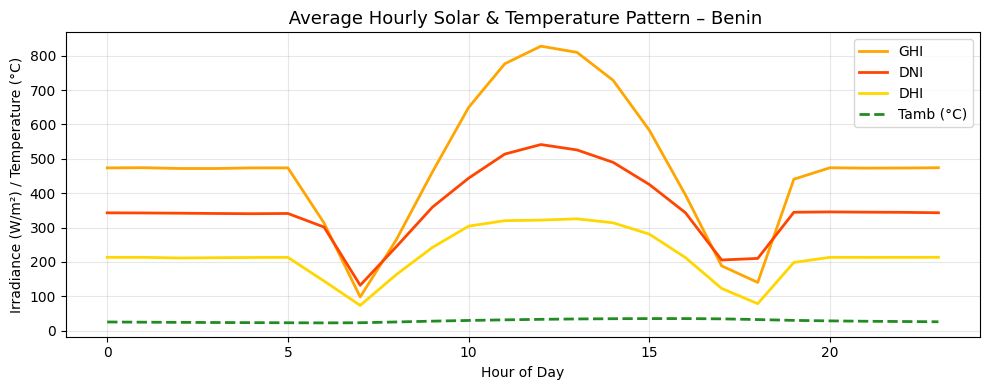

In [7]:
# Convert and sort timestamps
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"])
df_clean = df_clean.sort_values("Timestamp")

# --- First 24 hours visualization
day = df_clean.iloc[:1440]
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

colors = ["#FFA500", "#FF4500", "#FFD700", "#228B22"]  

for ax, col, c in zip(axes, ["GHI", "DNI", "DHI", "Tamb"], colors):
    ax.plot(day["Timestamp"], day[col], color=c, linewidth=1.5)
    ax.set_ylabel(col, fontsize=11)
    ax.grid(True, alpha=0.3)

axes[0].set_title("☀️ First-Day Solar & Temperature Profiles – Benin", fontsize=13)
axes[-1].set_xlabel("Time", fontsize=11)
plt.tight_layout()
plt.show()

# --- Hourly averages
df_clean["hour"] = df_clean["Timestamp"].dt.hour
hourly = df_clean.groupby("hour")[["GHI", "DNI", "DHI", "Tamb"]].mean()

plt.figure(figsize=(10, 4))
plt.plot(hourly.index, hourly["GHI"], label="GHI", color="#FFA500", linewidth=2)
plt.plot(hourly.index, hourly["DNI"], label="DNI", color="#FF4500", linewidth=2)
plt.plot(hourly.index, hourly["DHI"], label="DHI", color="#FFD700", linewidth=2)
plt.plot(hourly.index, hourly["Tamb"], label="Tamb (°C)", color="#228B22", linestyle="--", linewidth=2)

plt.title(" Average Hourly Solar & Temperature Pattern – Benin", fontsize=13)
plt.xlabel("Hour of Day")
plt.ylabel("Irradiance (W/m²) / Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##  Cleaning Impact
Average ModA & ModB grouped by cleaning flag.


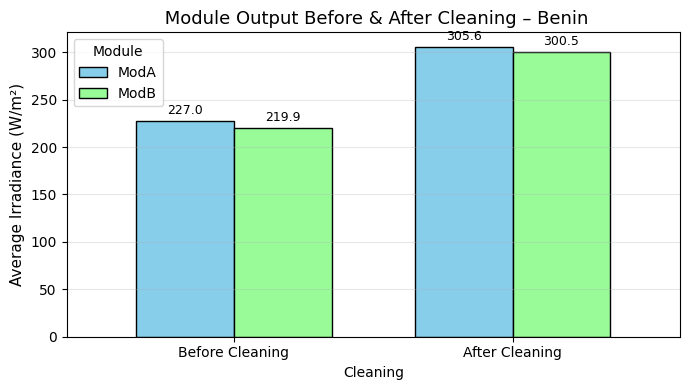

In [9]:
if {"Cleaning","ModA","ModB"}.issubset(df_clean.columns):
    avg_clean = df_clean.groupby("Cleaning")[["ModA","ModB"]].mean()
    ax = avg_clean.plot(
        kind="bar",
        figsize=(7,4),
        color=["#87CEEB", "#98FB98"],  # sky blue & light green
        edgecolor="black",
        width=0.7
    )
    plt.title(" Module Output Before & After Cleaning – Benin", fontsize=13)
    plt.ylabel("Average Irradiance (W/m²)", fontsize=11)
    plt.xticks([0,1], ["Before Cleaning", "After Cleaning"], rotation=0, fontsize=10)
    plt.grid(True, axis="y", alpha=0.3)
    plt.legend(title="Module", loc="upper left")

    # Add value labels above bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9, padding=3)

    plt.tight_layout()
    plt.show()
else:
    print("Skip: Cleaning/ModA/ModB columns not found.")


##  Correlations & Relationships
Heatmap + key scatter plots.


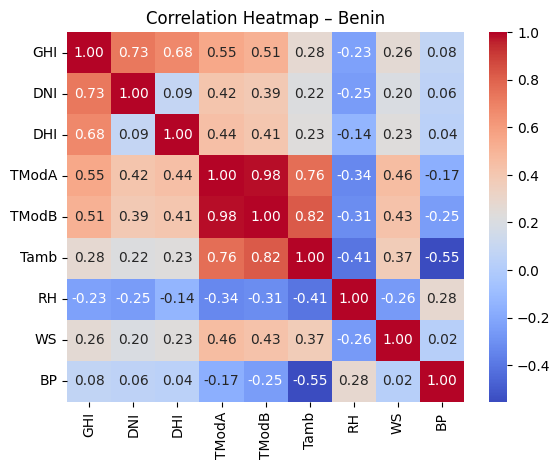

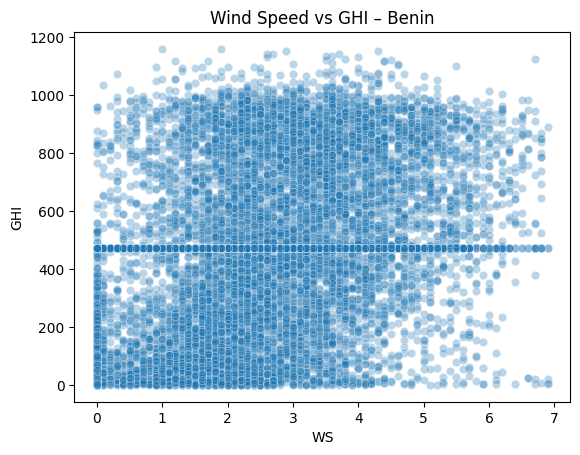

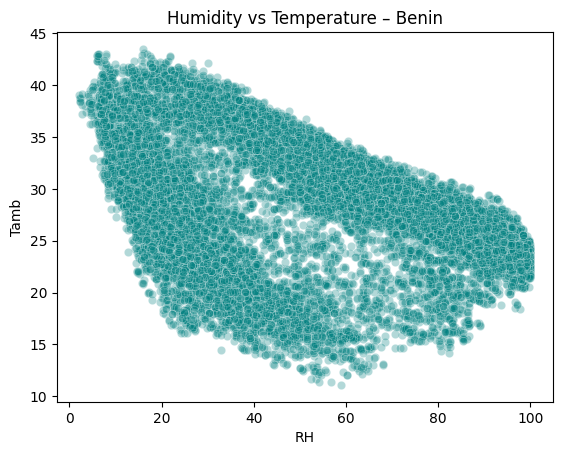

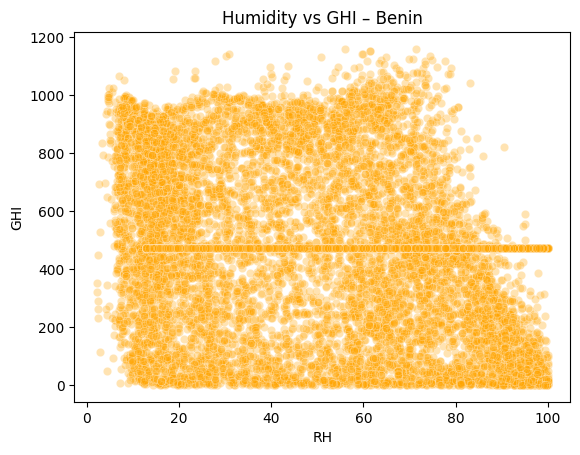

In [10]:
corr_cols = ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","WS","BP"]
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap – Benin"); plt.show()

sns.scatterplot(x="WS", y="GHI", data=df_clean.sample(n=20000, random_state=42), alpha=0.3)
plt.title("Wind Speed vs GHI – Benin"); plt.show()

sns.scatterplot(x="RH", y="Tamb", data=df_clean.sample(n=20000, random_state=42), alpha=0.3, color="teal")
plt.title("Humidity vs Temperature – Benin"); plt.show()

sns.scatterplot(x="RH", y="GHI", data=df_clean.sample(n=20000, random_state=42), alpha=0.3, color="orange")
plt.title("Humidity vs GHI – Benin"); plt.show()


##  Wind & Distributions
Histograms and polar (wind-rose) chart.


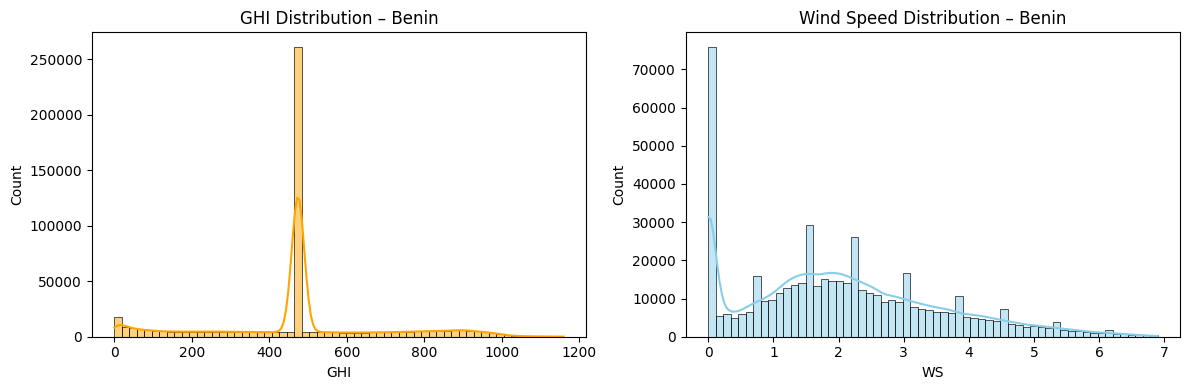

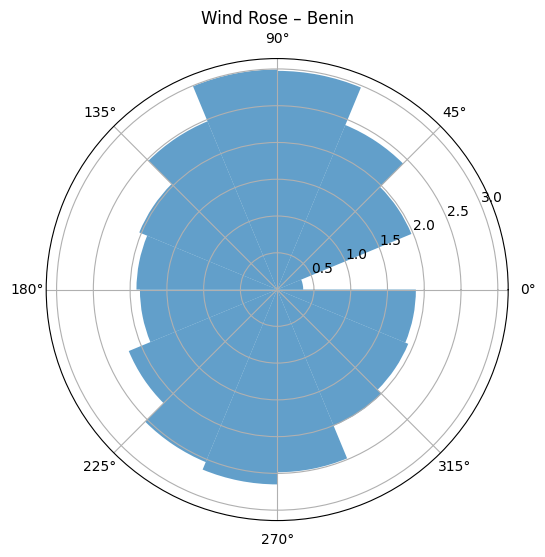

In [11]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_clean["GHI"], bins=60, kde=True, ax=axes[0], color="orange")
sns.histplot(df_clean["WS"], bins=60, kde=True, ax=axes[1], color="skyblue")
axes[0].set_title("GHI Distribution – Benin")
axes[1].set_title("Wind Speed Distribution – Benin")
plt.tight_layout(); plt.show()

# Wind-rose (mean WS per direction sector)
import numpy as np
wd = np.deg2rad(df_clean["WD"].to_numpy()); ws = df_clean["WS"].to_numpy()
bins = np.linspace(0, 2*np.pi, 17)
sector = np.digitize(wd, bins)-1
mean_ws = [ws[sector==i].mean() if np.any(sector==i) else 0 for i in range(len(bins)-1)]
fig = plt.figure(figsize=(6,6)); ax = plt.subplot(111, polar=True)
theta = (bins[:-1]+bins[1:])/2
ax.bar(theta, mean_ws, width=(2*np.pi/16), alpha=0.7)
ax.set_title("Wind Rose – Benin"); plt.show()


##  Temperature Analysis
Check how humidity affects temperature and irradiance.


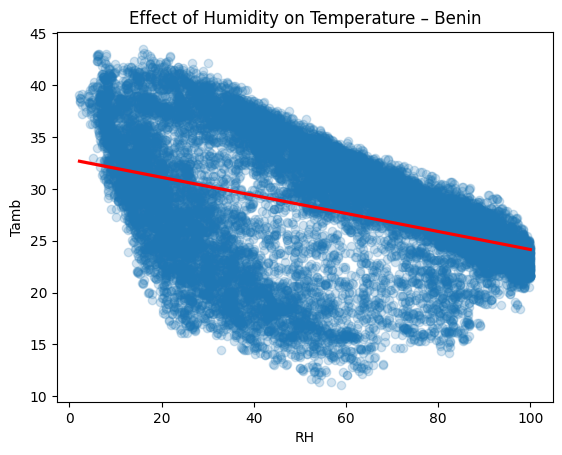

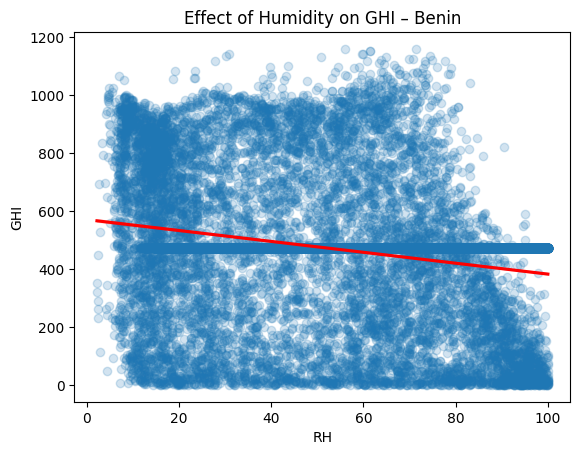

In [12]:
sns.regplot(x="RH", y="Tamb", data=df_clean.sample(n=20000, random_state=42),
            scatter_kws={"alpha":0.2}, line_kws={"color":"red"})
plt.title("Effect of Humidity on Temperature – Benin"); plt.show()

sns.regplot(x="RH", y="GHI", data=df_clean.sample(n=20000, random_state=42),
            scatter_kws={"alpha":0.2}, line_kws={"color":"red"})
plt.title("Effect of Humidity on GHI – Benin"); plt.show()


## Bubble Chart – GHI vs Tamb (size/color = RH)


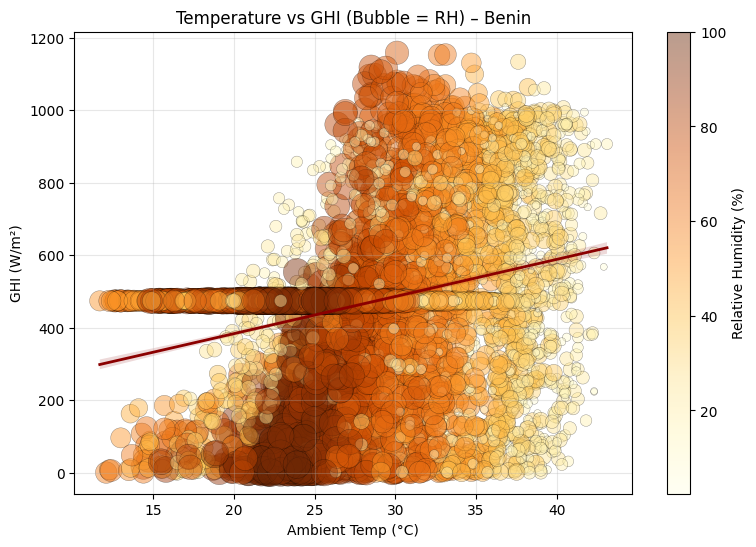

In [13]:
sample = df_clean.sample(n=8000, random_state=42)
plt.figure(figsize=(9,6))
sc = plt.scatter(sample["Tamb"], sample["GHI"], s=sample["RH"]*4, c=sample["RH"],
                 cmap="YlOrBr", alpha=0.45, edgecolors="k", linewidth=0.3)
sns.regplot(x="Tamb", y="GHI", data=sample, scatter=False, color="darkred", line_kws={"linewidth":2})
plt.colorbar(sc, label="Relative Humidity (%)")
plt.title("Temperature vs GHI (Bubble = RH) – Benin")
plt.xlabel("Ambient Temp (°C)"); plt.ylabel("GHI (W/m²)")
plt.grid(True, alpha=0.3); plt.show()


In [14]:
df.to_csv("../data/benin_clean.csv", index=False)
print("✅ Cleaned Benin dataset saved successfully.")


✅ Cleaned Benin dataset saved successfully.
